In [2]:
train_dir = './data/dogs-vs-cats/train'
test_dir = './data/dogs-vs-cats/test'

In [13]:
from tensorflow.keras import layers, models, callbacks
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
#엑셀 cnn_catas_dogs 참고!!
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2))) # 일종의 모자이크화를 통해 특징을 유지한채 사진 축소
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_path = './dogs-vs-cats.keras'
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5)
checkpoint = callbacks.ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=15,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=15,
        class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [19]:
history = model.fit(
      train_generator,
      epochs=10,
      validation_data=validation_generator,
      callbacks=[early_stopping, checkpoint])

Epoch 1/10
 560/1334 ━━━━━━━━━━━━━━━━━━━━ 5:29 425ms/step - accuracy: 0.5295 - loss: 0.6919

KeyboardInterrupt: 

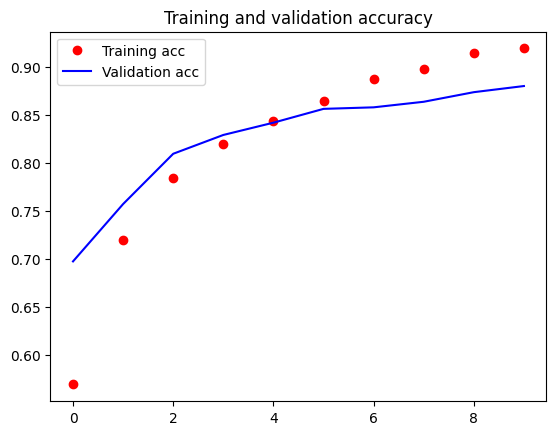

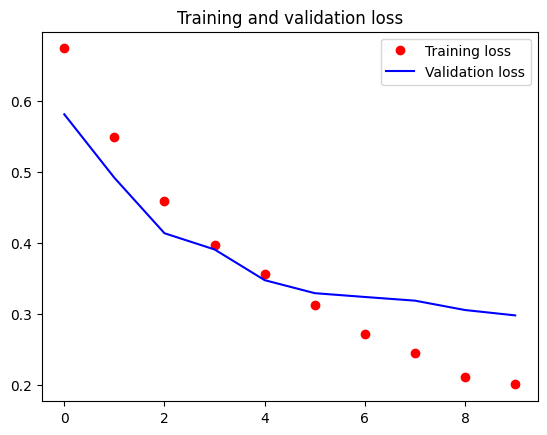

In [22]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

In [36]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models
import numpy as np
import matplotlib.pyplot as plt
import os


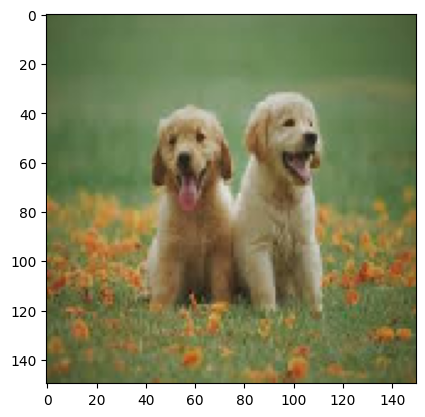

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
prediction:  1.00
It's dog!


In [38]:

img_path = "./data/p1.jpg"
img = image.load_img(img_path, target_size=(150, 150))
plt.imshow(img)
plt.show()

img_array = image.img_to_array(img).astype(float) / 255
img_batch = np.expand_dims(img_array, axis=0)

model = models.load_model('./dogs-vs-cats.keras')
prediction = model.predict(img_batch)
prediction = prediction.flatten()

print("prediction:  %.2f" % prediction[0])

if prediction[0] < 0.5:
    print("It's cat!")
else:
    print("It's dog!")

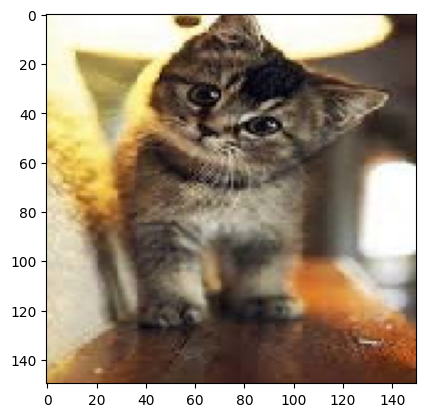

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
prediction:  0.93
It's dog!


In [ ]:


img_path = "./data/c1.jpg"
img = image.load_img(img_path, target_size=(150, 150))
plt.imshow(img)
plt.show()

img_array = image.img_to_array(img).astype(float) / 255
img_batch = np.expand_dims(img_array, axis=0)

model = models.load_model('./dogs-vs-cats.keras')
prediction = model.predict(img_batch)
prediction = prediction.flatten()

print("prediction:  %.2f" % prediction[0])

if prediction[0] < 0.5:
    print("It's cat!")
else:
    print("It's dog!")

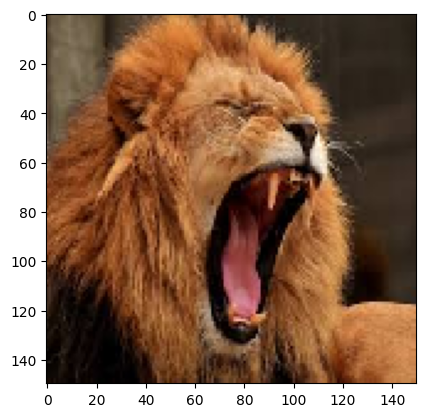

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
prediction:  1.00
It's dog!


In [40]:


img_path = "./data/c4.jpg"
img = image.load_img(img_path, target_size=(150, 150))
plt.imshow(img)
plt.show()

img_array = image.img_to_array(img).astype(float) / 255
img_batch = np.expand_dims(img_array, axis=0)

model = models.load_model('./dogs-vs-cats.keras')
prediction = model.predict(img_batch)
prediction = prediction.flatten()

print("prediction:  %.2f" % prediction[0])

if prediction[0] < 0.5:
    print("It's cat!")
else:
    print("It's dog!")

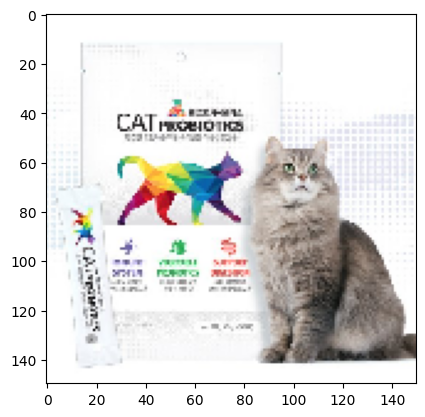

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
prediction:  0.02
It's cat!


In [41]:


img_path = "./data/c3.jpg"
img = image.load_img(img_path, target_size=(150, 150))
plt.imshow(img)
plt.show()

img_array = image.img_to_array(img).astype(float) / 255
img_batch = np.expand_dims(img_array, axis=0)

model = models.load_model('./dogs-vs-cats.keras')
prediction = model.predict(img_batch)
prediction = prediction.flatten()

print("prediction:  %.2f" % prediction[0])

if prediction[0] < 0.5:
    print("It's cat!")
else:
    print("It's dog!")

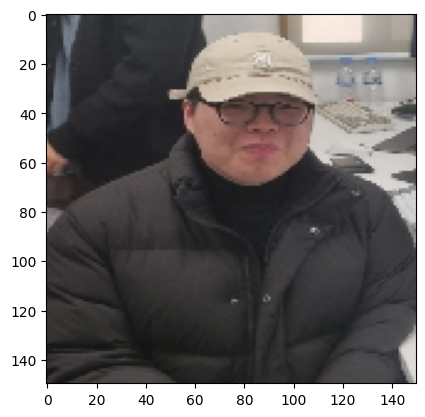

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
prediction:  0.70
It's dog!


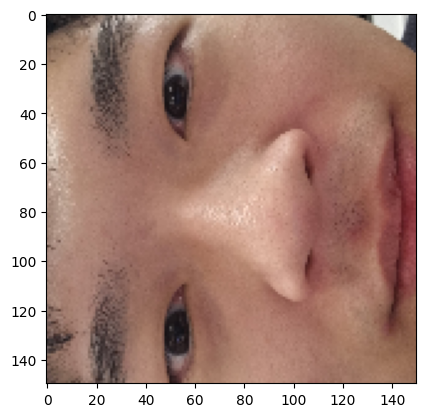

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 770ms/step
prediction:  0.39
It's cat!


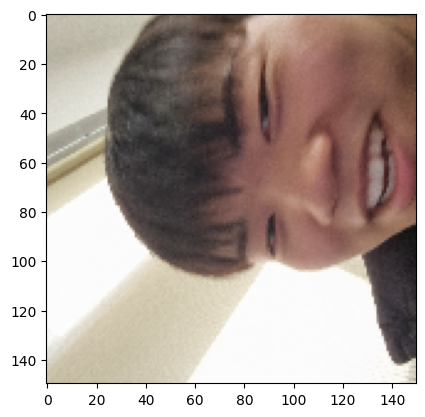

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
prediction:  0.72
It's dog!


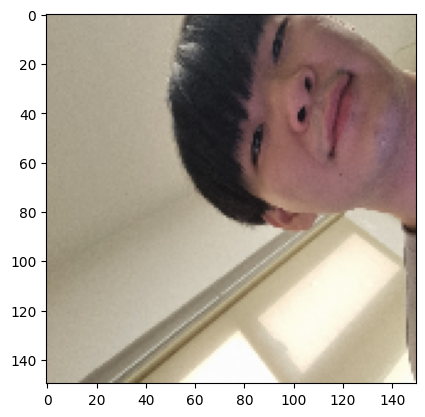

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
prediction:  0.31
It's cat!


In [46]:


img_path = "./data/20260114_152418.jpg"
img = image.load_img(img_path, target_size=(150, 150))
plt.imshow(img)
plt.show()

img_array = image.img_to_array(img).astype(float) / 255
img_batch = np.expand_dims(img_array, axis=0)

model = models.load_model('./dogs-vs-cats.keras')
prediction = model.predict(img_batch)
prediction = prediction.flatten()

print("prediction:  %.2f" % prediction[0])

if prediction[0] < 0.5:
    print("It's cat!")
else:
    print("It's dog!")